# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [30]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

# set the ChromeDriver Browser
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [31]:
# set the url and Visit the website in a new browser window using the ChromeDriver
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [32]:
# Create a Beautiful Soup object of the parsed html code from the website
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [33]:
# Extract all rows of data
table = soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [ ]:
# Create empty lists for the data and the headers for the data
data_headers = []
data_rows = []

# all the row headers are found within the tr class and they 
# are all captured from each of their th classes
row_headers = table.find('tr')
headers = row_headers.find_all('th')

# capture all the row data from this table
row_data = table.find_all('tr', class_='data-row')

# loop through the headers and append them to the data_headers list
for item in headers:
    data_headers.append(item.text.strip())

# loop through the row_data capturing each td element, 
# extracting the text from each td, and then appending
# this data into the data_rows list
for row in row_data:
    td_elements = row.find_all('td')
    row_data = [td.text.strip() for td in td_elements]
    data_rows.append(row_data)


In [34]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_data_df = pd.DataFrame(data_rows, columns=data_headers)

In [52]:
# Confirm DataFrame was created successfully by showing it
mars_data_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [36]:
# Examine data type of each column
print(mars_data_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [37]:
# Change data types for data analysis
mars_data_df['terrestrial_date'] = pd.to_datetime(mars_data_df['terrestrial_date'])
mars_data_df['sol'] = mars_data_df['sol'].astype(int)
mars_data_df['ls'] = mars_data_df['ls'].astype(int)
mars_data_df['month'] = mars_data_df['month'].astype(int)
mars_data_df['min_temp'] = mars_data_df['min_temp'].astype(float)
mars_data_df['pressure'] = mars_data_df['pressure'].astype(float)

In [38]:
# Confirm type changes were successful by examining data types again
print(mars_data_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [157]:
# 1. How many months are there on Mars?
print(f'The number of months during a year on Mars in this dataset is: {mars_data_df['month'].nunique()}')
print('(although, since Mars doesn\'t have one moon to measure months such as the Earth, there is no official way to measure months in a Martian year.')

The number of months during a year on Mars in this dataset is: 12
(although, since Mars doesn't have one moon to measure months such as the Earth, there is no official way to measure months in a Martian year.


In [50]:
# 2. How many sols (Martian days) worth of data are there?
print(f'The number of sols (Martian days) worth of data in this dataset is: {mars_data_df['sol'].nunique()}')

The number of sols (Martian days) worth of data in this dataset is: 1867


In [103]:
# 3. What is the average minimum temperature by month?
print(f'The average minimum temperature per by month is:')
average_min_temp_by_month = mars_data_df.groupby('month')['min_temp'].mean().reset_index()
average_min_temp_by_month

The average minimum temperature per by month is:


,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


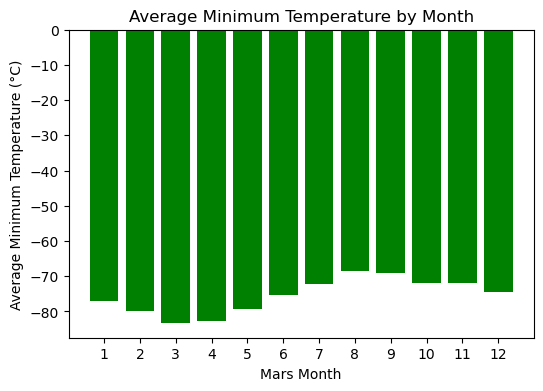

In [150]:
# Plot the average minimum temperature by month
plt.figure(figsize=(6,4))
plt.bar(average_min_temp_by_month['month'], average_min_temp_by_month['min_temp'], color='green')

# Add axis labels and title
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Mars Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(average_min_temp_by_month['month'])
plt.show()

The coldest month recorded at Curiosity's location was month #3 with an average temperature of -83.30729166666667°C
The warmest month recorded at Curiosity's location was month #8 with an average temperature of -68.38297872340425°C
These calculations are represented graphically below:


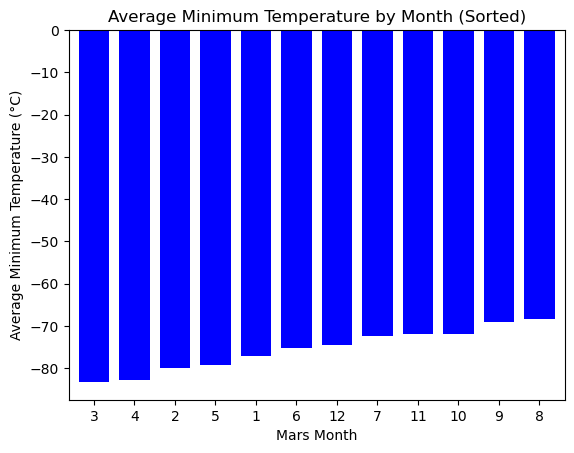

In [151]:
# Sort the data by 'min_temp' in ascending order
average_min_temp_by_month_sorted = average_min_temp_by_month.sort_values(by='min_temp', ascending=True)

# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
print(f'The coldest month recorded at Curiosity\'s location was month #\
{average_min_temp_by_month_sorted['month'].iloc[0]} with an average temperature of {average_min_temp_by_month_sorted['min_temp'].min()}°C')
print(f'The warmest month recorded at Curiosity\'s location was month #\
{average_min_temp_by_month_sorted['month'].iloc[-1]} with an average temperature of {average_min_temp_by_month_sorted['min_temp'].max()}°C')
print(f'These calculations are represented graphically below:')

# plot the newly-sorted data sorted by min_temp
average_min_temp_by_month_sorted.plot.bar(x='month', y='min_temp', rot=0, legend=False, color='blue', width=0.75)

# Add title and labels
plt.title('Average Minimum Temperature by Month (Sorted)')
plt.xlabel('Mars Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.show()

In [109]:
# 4. What is the average pressure by month?
print(f'The average pressure per by month is:')
average_pressure_by_month = mars_data_df.groupby('month')['pressure'].mean().reset_index()
average_pressure_by_month

The average pressure per by month is:


,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


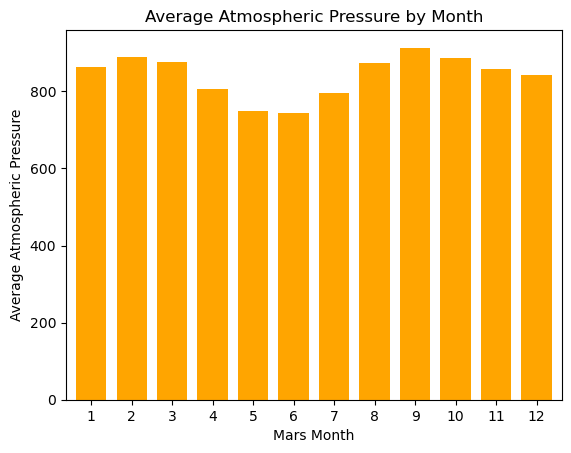

In [152]:
# Plot the average pressure by month
average_pressure_by_month.plot.bar(x='month', y='pressure', rot=0, legend=False, color='orange', width=0.75)
plt.title('Average Atmospheric Pressure by Month')
plt.xlabel('Mars Month')
plt.ylabel('Average Atmospheric Pressure')
plt.show()

The lowest average atmospheric pressure recorded at Curiosity's location was 745.0544217687075 during month #6
The highest average atmospheric pressure recorded at Curiosity's location was 913.3059701492538 during month #9
These calculations are represented graphically below:


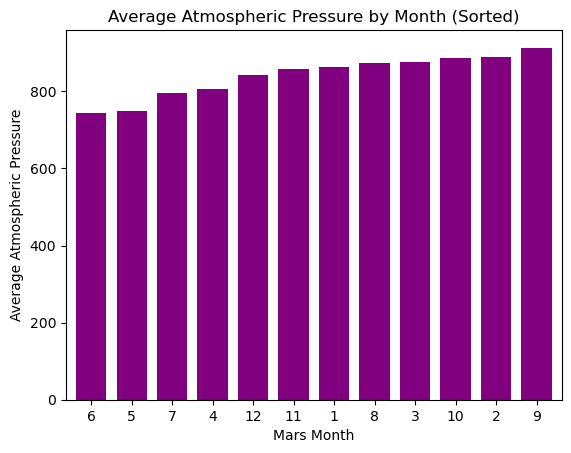

In [153]:
# Sort the data by 'pressure' in ascending order
average_pressure_by_month_sorted = average_pressure_by_month.sort_values(by='pressure', ascending=True)

# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
print(f'The lowest average atmospheric pressure recorded at Curiosity\'s location was \
{average_pressure_by_month_sorted['pressure'].min()} during month #{average_pressure_by_month_sorted['month'].iloc[0]}')
print(f'The highest average atmospheric pressure recorded at Curiosity\'s location was \
{average_pressure_by_month_sorted['pressure'].max()} during month #{average_pressure_by_month_sorted['month'].iloc[-1]}')
print(f'These calculations are represented graphically below:')

# plot the newly-sorted data sorted by pressure
average_pressure_by_month_sorted.plot.bar(x='month', y='pressure', rot=0, legend=False, color='purple', width=0.75)

# Add title and labels
plt.title('Average Atmospheric Pressure by Month (Sorted)')
plt.xlabel('Mars Month')
plt.ylabel('Average Atmospheric Pressure')
plt.show()

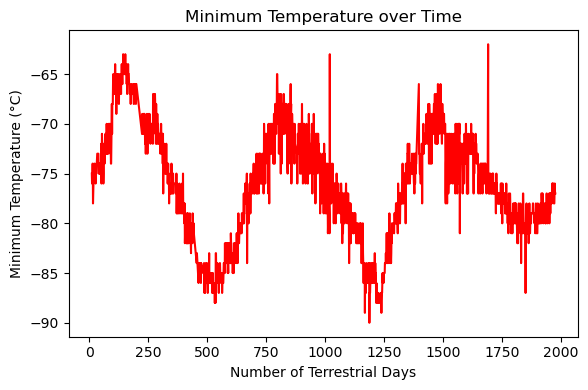

In [154]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# Plot the data as a bar chart
plt.figure(figsize=(6,4))
plt.plot(mars_data_df['sol'], mars_data_df['min_temp'], color='red')

# Add titles and labels
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')

# Show the plot
plt.tight_layout()
plt.show()

# Analysis

#### <ins>How many months exist on Mars?</ins>

- Since Mars doesn't have one moon to measure a month by like the Earth, there are no officially recognized ways to divide a Martian year into a certain number of months.  The general consensus to measure a Martian year as closely to an Earth year as possible is to divide a Martian year into 24 months.
- In this dataset however, there are 12 unique months in the Martian year of data collection. 
- This is captured by printing the number of unique month values with the nunique() function.  The code and print method are below:

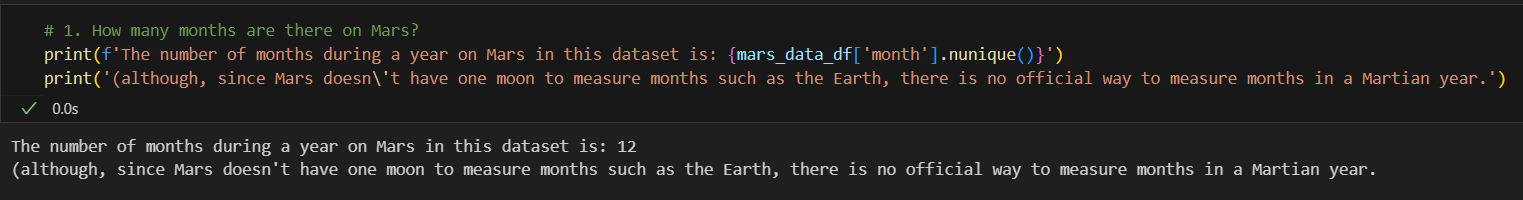

#### <ins>How many Martian days worth of data are there in this dataset?</ins>
- A sol is the measurement of one day on Mars (the time is takes for it to complete one full rotation on its axis)
- To calculate the number of sols in this dataset, I used the nuniquie() function on the "sol" column.  This returns the number of unique numbers in this column
- The code & print function are below:

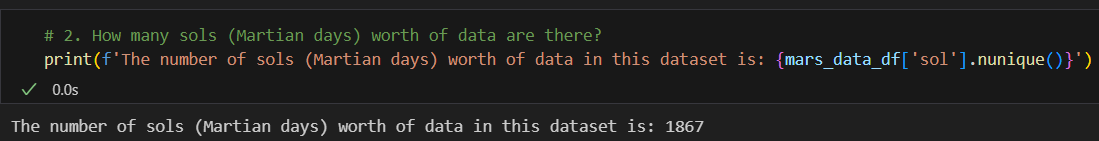

#### <ins>Which month, on average, has the lowest temperature? The highest?</ins>
- In order to capture this data, I first needed to get the average temperature for each month in the dataset
- To do this, I used the group_by function to group the data by month, then, I took the mean() of min_temp for each month grouping
- Once I captured this, I sorted the min_temp results in a new dataframe in ascending order so that the lowest temperature was first and the highest was last
- Then, to capture the month with the lowest temperature, I took the ['month'].iloc[0] of the newly-sorted dataframe to get the first month in the column (which is the month with the lowest average temperature because I sorted the temp data).  And, to get the lowest temperature, I used ['min_temp'].min() to get the lowest value in the min_temp column.
- To capture the month with the lowest temperature, I took the ['month'].iloc[-1] of this newly-sorted dataframe to get the last month in the column (which is the month with the highest average temperature because I sorted the temp data). And, to get the highest temperature, I used ['min_temp'].max() to get the highest value in the min_temp column. 
- This is expressed with print functions and graphically below:

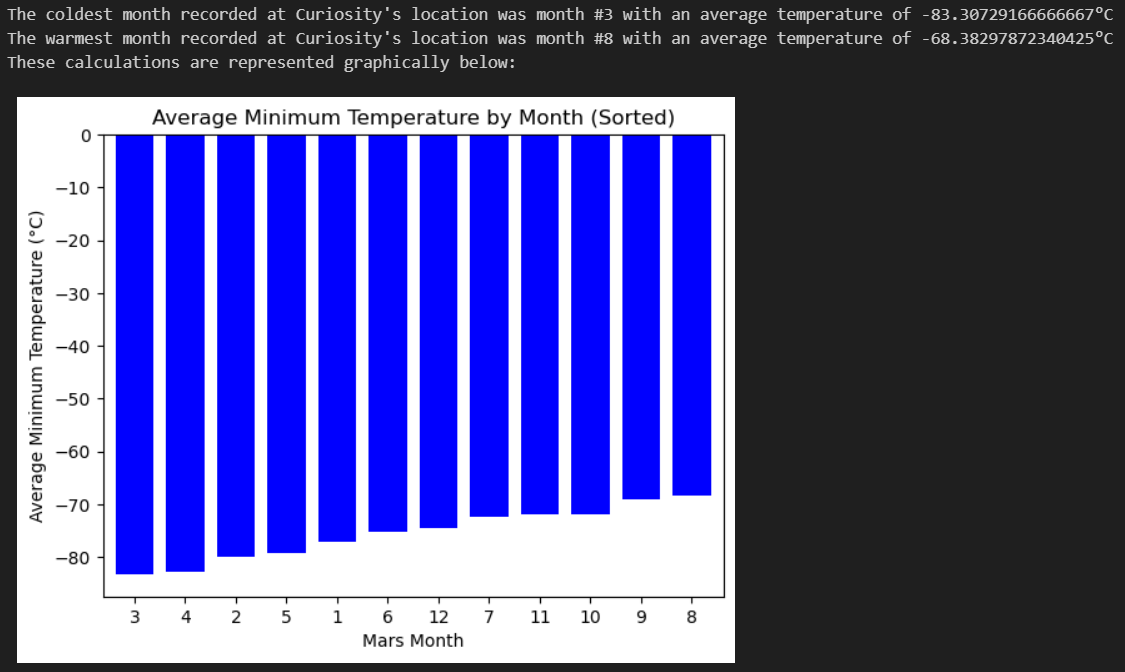

#### <ins>Which month, on average, has the lowest atmospheric pressure? The highest?</ins>
- In order to capture this data, I first needed to get the average atmospheric pressure for each month in the dataset
- To do this, I used the group_by() function to group the data by month, then, I took the mean() of pressure values for each month grouping
- Once I captured this, I sorted the pressure results in a new dataframe in ascending order so that the lowest average atmospheric pressure was first and the highest was last
- Then, to capture the month with the lowest average atmospheric pressure, I took the ['month'].iloc[0] of the newly-sorted dataframe to get the first month in the column (which is the month with the lowest average atmospheric pressure because I sorted the pressure values).  And, to get the lowest average atmospheric pressure, I used ['pressure'].min() to get the lowest value in the pressure column.
- Then, to capture the month with the highest average atmospheric pressure, I took the ['month'].iloc[-1] of the newly-sorted dataframe to get the last month in the column (which is the month with the highest average atmospheric pressure because I sorted the pressure values).  And, to get the highest average atmospheric pressure, I used ['pressure'].max() to get the highest value in the pressure column.
- This is expressed with print functions and graphically below:

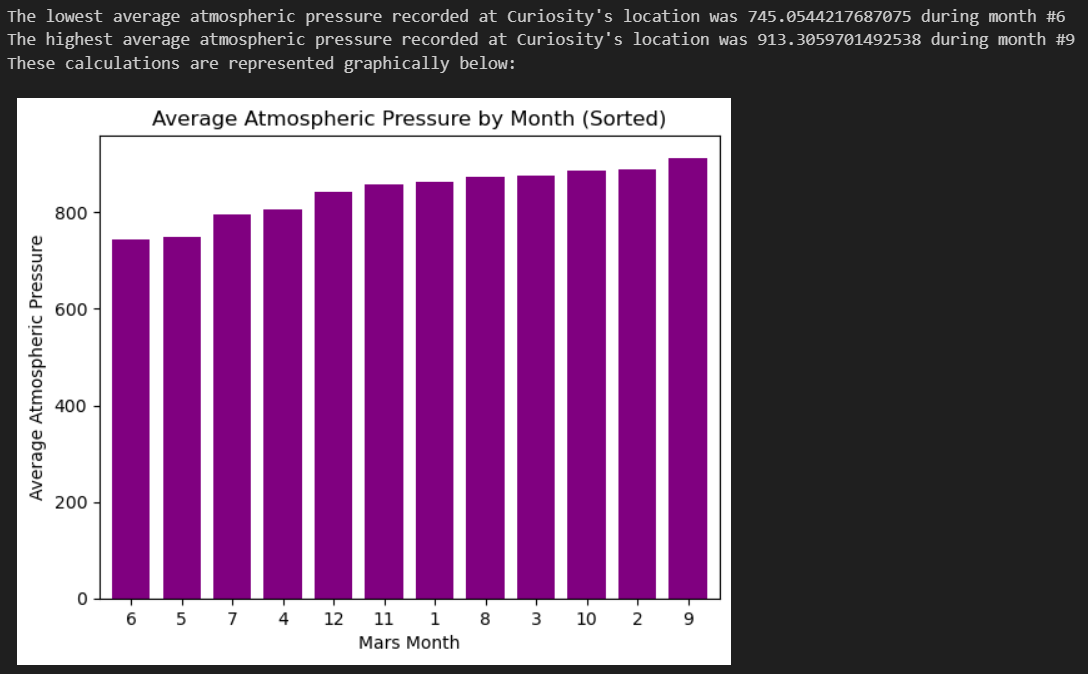


#### <ins>How many terrestrial days exist in a Martian year? A visual estimate within 25% was made.</ins>
- In order to give an accurate estimate based on graphical data, I first needed to create a plot of the number of terrestrial days (Earth days) as they relate to the Minimum Temperature values captured by the Curiosity Rover
- To do this, I created a pandas plot using the pd.plot() function with the "sol" column as the x-axis and "min_temp" as the y-axis
- In this plotted graph, it is easy to see a clear cycle of temperatures.  This dataset begins in the 6th month of the Martian calendar, completes two full 12 month cycles, and then shows a 5 month period at the end.
- A Martian year is calculated by Mars making a full orbit around the sun.  This means that where the Curiosity Rover is capturing temperature data will be facing the sun during the "summer" for that part of the planet, and facing away from the sun during the "winter" for that part of the planet.
- So, in the graphical data, a valley of low temperatures at the beginning of the full 12 month cycle can be seen (winter), then a peak of high temperatures can be seen halfway through the cycle (summer), and then the temperature readings go back down to approximately the same level as the first valley of low temperatures (winter again). 
- Knowing this, we can draw a visual estimate of how many terrestrial days exist in a martian year. These are represented by the black lines drawn on the graph below.
- 1200 terrestrial days MINUS 510 terrestrial days = 690 terrestrial days in one temperature cycle (year).  
- Looking up on NASA's site, the actual measured value of Earth days in a Martian year is approximately 687 days.  This shows that our visual / graphical estimate of this value was very accurate

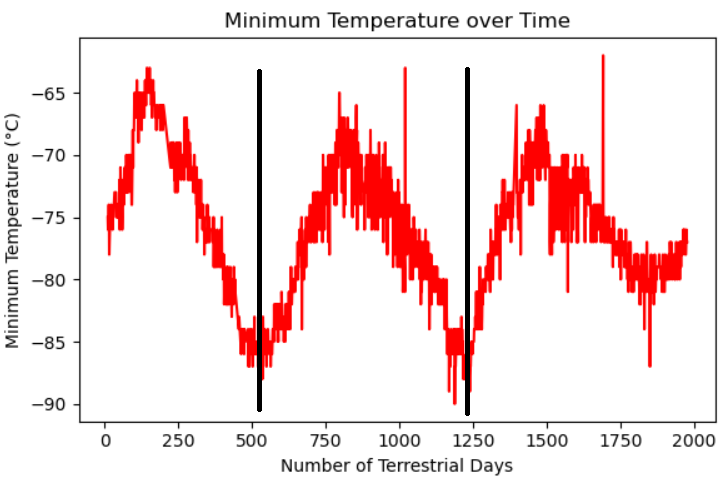

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [158]:
# Write the data to a CSV
mars_data_df.to_csv('mars_data.csv', index=False)

In [159]:
browser.quit()